In [10]:
import json 
from dotenv import load_dotenv, find_dotenv
import warnings
warnings.simplefilter('ignore')
load_dotenv(find_dotenv('./file.env'))

True

In [4]:
import requests
from newspaper import Article

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
}

article_url = "https://www.artificialintelligence-news.com/2022/01/25/meta-claims-new-ai-supercomputer-will-set-records/"

session = requests.Session()

try:
    response = session.get(article_url, headers=headers, timeout=10)
    
    if response.status_code == 200:
        article = Article(article_url)
        article.download()
        article.parse()
        
        print(f"Title: {article.title}")
        print(f"Text: {article.text}")
        
    else:
        print(f"Failed to fetch article at {article_url}")
except Exception as e:
    print(f"Error occurred while fetching article at {article_url}: {e}")

Title: Meta claims its new AI supercomputer will set records
Text: Ryan Daws is a senior editor at TechForge Media with over a decade of experience in crafting compelling narratives and making complex topics accessible. His articles and interviews with industry leaders have earned him recognition as a key influencer by organisations like Onalytica. Under his leadership, publications have been praised by analyst firms such as Forrester for their excellence and performance. Connect with him on X (@gadget_ry) or Mastodon (@gadgetry@techhub.social)

Meta (formerly Facebook) has unveiled an AI supercomputer that it claims will be the world’s fastest.

The supercomputer is called the AI Research SuperCluster (RSC) and is yet to be fully complete. However, Meta’s researchers have already begun using it for training large natural language processing (NLP) and computer vision models.

RSC is set to be fully built in mid-2022. Meta says that it will be the fastest in the world once complete and 

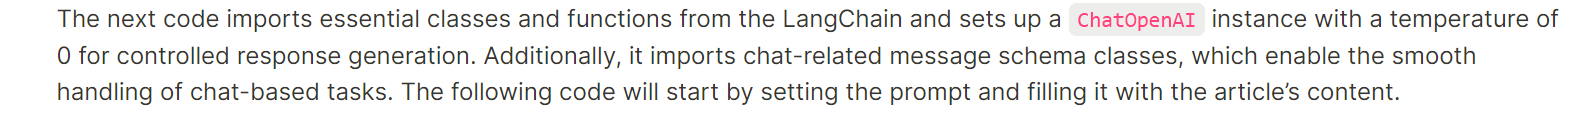

In [6]:
from langchain.schema import HumanMessage

In [7]:
# we get the article data from the scraping part
article_title = article.title
article_text = article.text


# prepare template for prompt
template = """You are a very good assistant that summarizes online articles.

Here's the article you want to summarize.

==================
Title: {article_title}

{article_text}
==================

Write a summary of the previous article.
"""

In [8]:
prompt = template.format(article_title=article.title, article_text=article.text)

messages = [HumanMessage(content=prompt)]

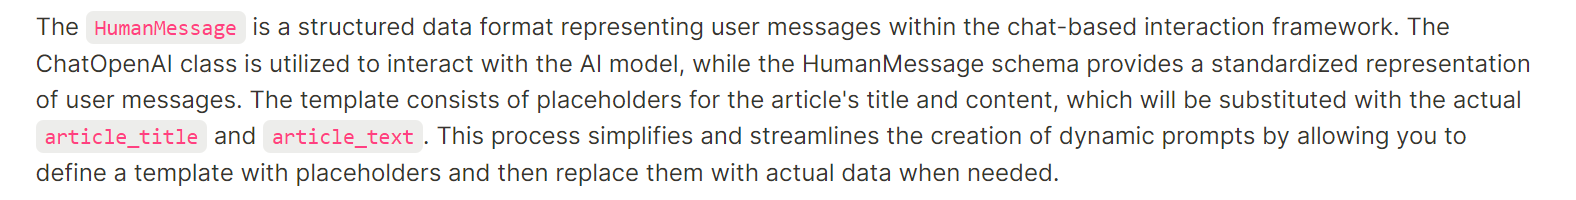

In [11]:
from langchain.chat_models import ChatOpenAI

# load the model
chat = ChatOpenAI(model_name="gpt-4", temperature=0)

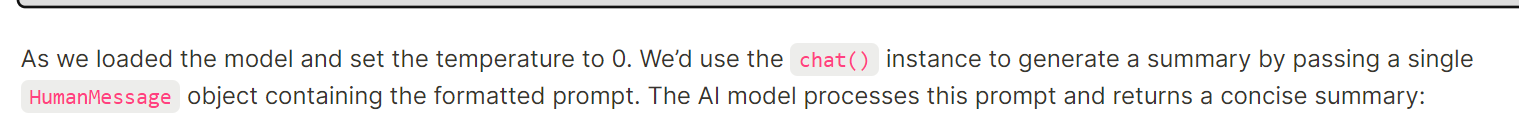

In [12]:
# generate summary
summary = chat(messages)
print(summary.content)

Meta, formerly known as Facebook, has announced the development of an AI supercomputer, the AI Research SuperCluster (RSC), which it claims will be the world's fastest upon completion in mid-2022. The RSC is already being used by Meta's researchers for training large natural language processing and computer vision models. The supercomputer is expected to be 20 times faster than Meta's current V100-based clusters and will be capable of training models with trillions of parameters. The RSC is designed with security and privacy controls, allowing Meta to use real-world examples from its production systems in production training. This will help advance research for tasks such as identifying harmful content on its platforms.


In [13]:
#if we want bullted list we can modifty the prompt and ge tthe result

# prepare template for prompt
template = """You are an advanced AI assistant that summarizes online articles into bulleted lists.

Here's the article you need to summarize.

==================
Title: {article_title}

{article_text}
==================

Now, provide a summarized version of the article in a bulleted list format.
"""

# format prompt
#typical string formatting used for assigning values to keys in the string
prompt = template.format(article_title=article.title, article_text=article.text)

# generate summary
summary = chat([HumanMessage(content=prompt)])
print(summary.content)

- Meta (formerly Facebook) has announced an AI supercomputer, the AI Research SuperCluster (RSC), which it claims will be the world's fastest.
- The RSC is not yet fully built, but is already being used by Meta's researchers for training large natural language processing (NLP) and computer vision models.
- The supercomputer is expected to be fully operational by mid-2022 and is aimed at training models with trillions of parameters.
- Meta hopes that RSC will help build new AI systems that can power real-time voice translations for large groups of people speaking different languages.
- The work done with RSC is expected to contribute to the development of technologies for the next major computing platform, the metaverse.
- Meta expects RSC to be 20x faster than its current V100-based clusters, 9x faster at running the NVIDIA Collective Communication Library (NCCL), and 3x faster at training large-scale NLP workflows.
- A model with tens of billions of parameters can finish training in t